### Ściągam konkretne api

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedBaggingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

pd.set_option('display.max_columns', None)

In [58]:
data = pd.read_csv("Hotel Reservations.csv")
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [59]:
df = data.copy()
print(df.isnull().sum())
df.dropna()
# print(df.dtypes)
len(df)

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


36275

okej, więc mamy 36 275 rekordów, data sama w sobie wydaje się czysta i elegancka 

In [60]:
df.drop(columns=["Booking_ID"], axis=1, inplace=True) # Nikomu nie jest ona potrzebna horera
df.duplicated().sum()

10275

10 275 zduplikowanych rekordów to duzo. Wydupcamy!

In [61]:
df.drop_duplicates(inplace=True)
df.shape

(26000, 18)

Z obliczeń wynika, ze mamy teraz 18 kolumn i 26 tysięcy rekordów. 

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,26000.0,1.890000,0.528702,0.0,2.00,2.0,2.0,4.0
no_of_children,26000.0,0.141231,0.462502,0.0,0.00,0.0,0.0,10.0
no_of_weekend_nights,26000.0,0.882385,0.887371,0.0,0.00,1.0,2.0,7.0
no_of_week_nights,26000.0,2.261923,1.512341,0.0,1.00,2.0,3.0,17.0
required_car_parking_space,26000.0,0.042115,0.200856,0.0,0.00,0.0,0.0,1.0
lead_time,26000.0,66.452846,68.606799,0.0,12.00,44.0,100.0,443.0
arrival_year,26000.0,2017.850269,0.356814,2017.0,2018.00,2018.0,2018.0,2018.0
arrival_month,26000.0,7.332923,3.138925,1.0,5.00,8.0,10.0,12.0
arrival_date,26000.0,15.750231,8.849394,1.0,8.00,16.0,23.0,31.0
repeated_guest,26000.0,0.032769,0.178035,0.0,0.00,0.0,0.0,1.0


In [63]:
df.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
dtype: int64

Zgodnie ze zwróconymi wartościami prawie nic nie jest booleanem - wszystko inty. horera

In [64]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

Dobra, no to spójrzmy co my tam mamy.

In [65]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    18558
Canceled         7442
Name: count, dtype: int64

In [66]:
def encoding(column):
    lb = LabelEncoder()
    print(f"dla kolumny |{column}| .")
    df[column] = lb.fit_transform(df[column])
    print(lb.classes_)
    print('-------------------------------------------------')

No i dobra, to bierzemy te, które widnieją jako obiekty.

In [67]:
encoding('type_of_meal_plan')
encoding('room_type_reserved')
encoding('market_segment_type')
encoding('booking_status')

dla kolumny |type_of_meal_plan| .
['Meal Plan 1' 'Meal Plan 2' 'Meal Plan 3' 'Not Selected']
-------------------------------------------------
dla kolumny |room_type_reserved| .
['Room_Type 1' 'Room_Type 2' 'Room_Type 3' 'Room_Type 4' 'Room_Type 5'
 'Room_Type 6' 'Room_Type 7']
-------------------------------------------------
dla kolumny |market_segment_type| .
['Aviation' 'Complementary' 'Corporate' 'Offline' 'Online']
-------------------------------------------------
dla kolumny |booking_status| .
['Canceled' 'Not_Canceled']
-------------------------------------------------


<Figure size 4000x4000 with 0 Axes>

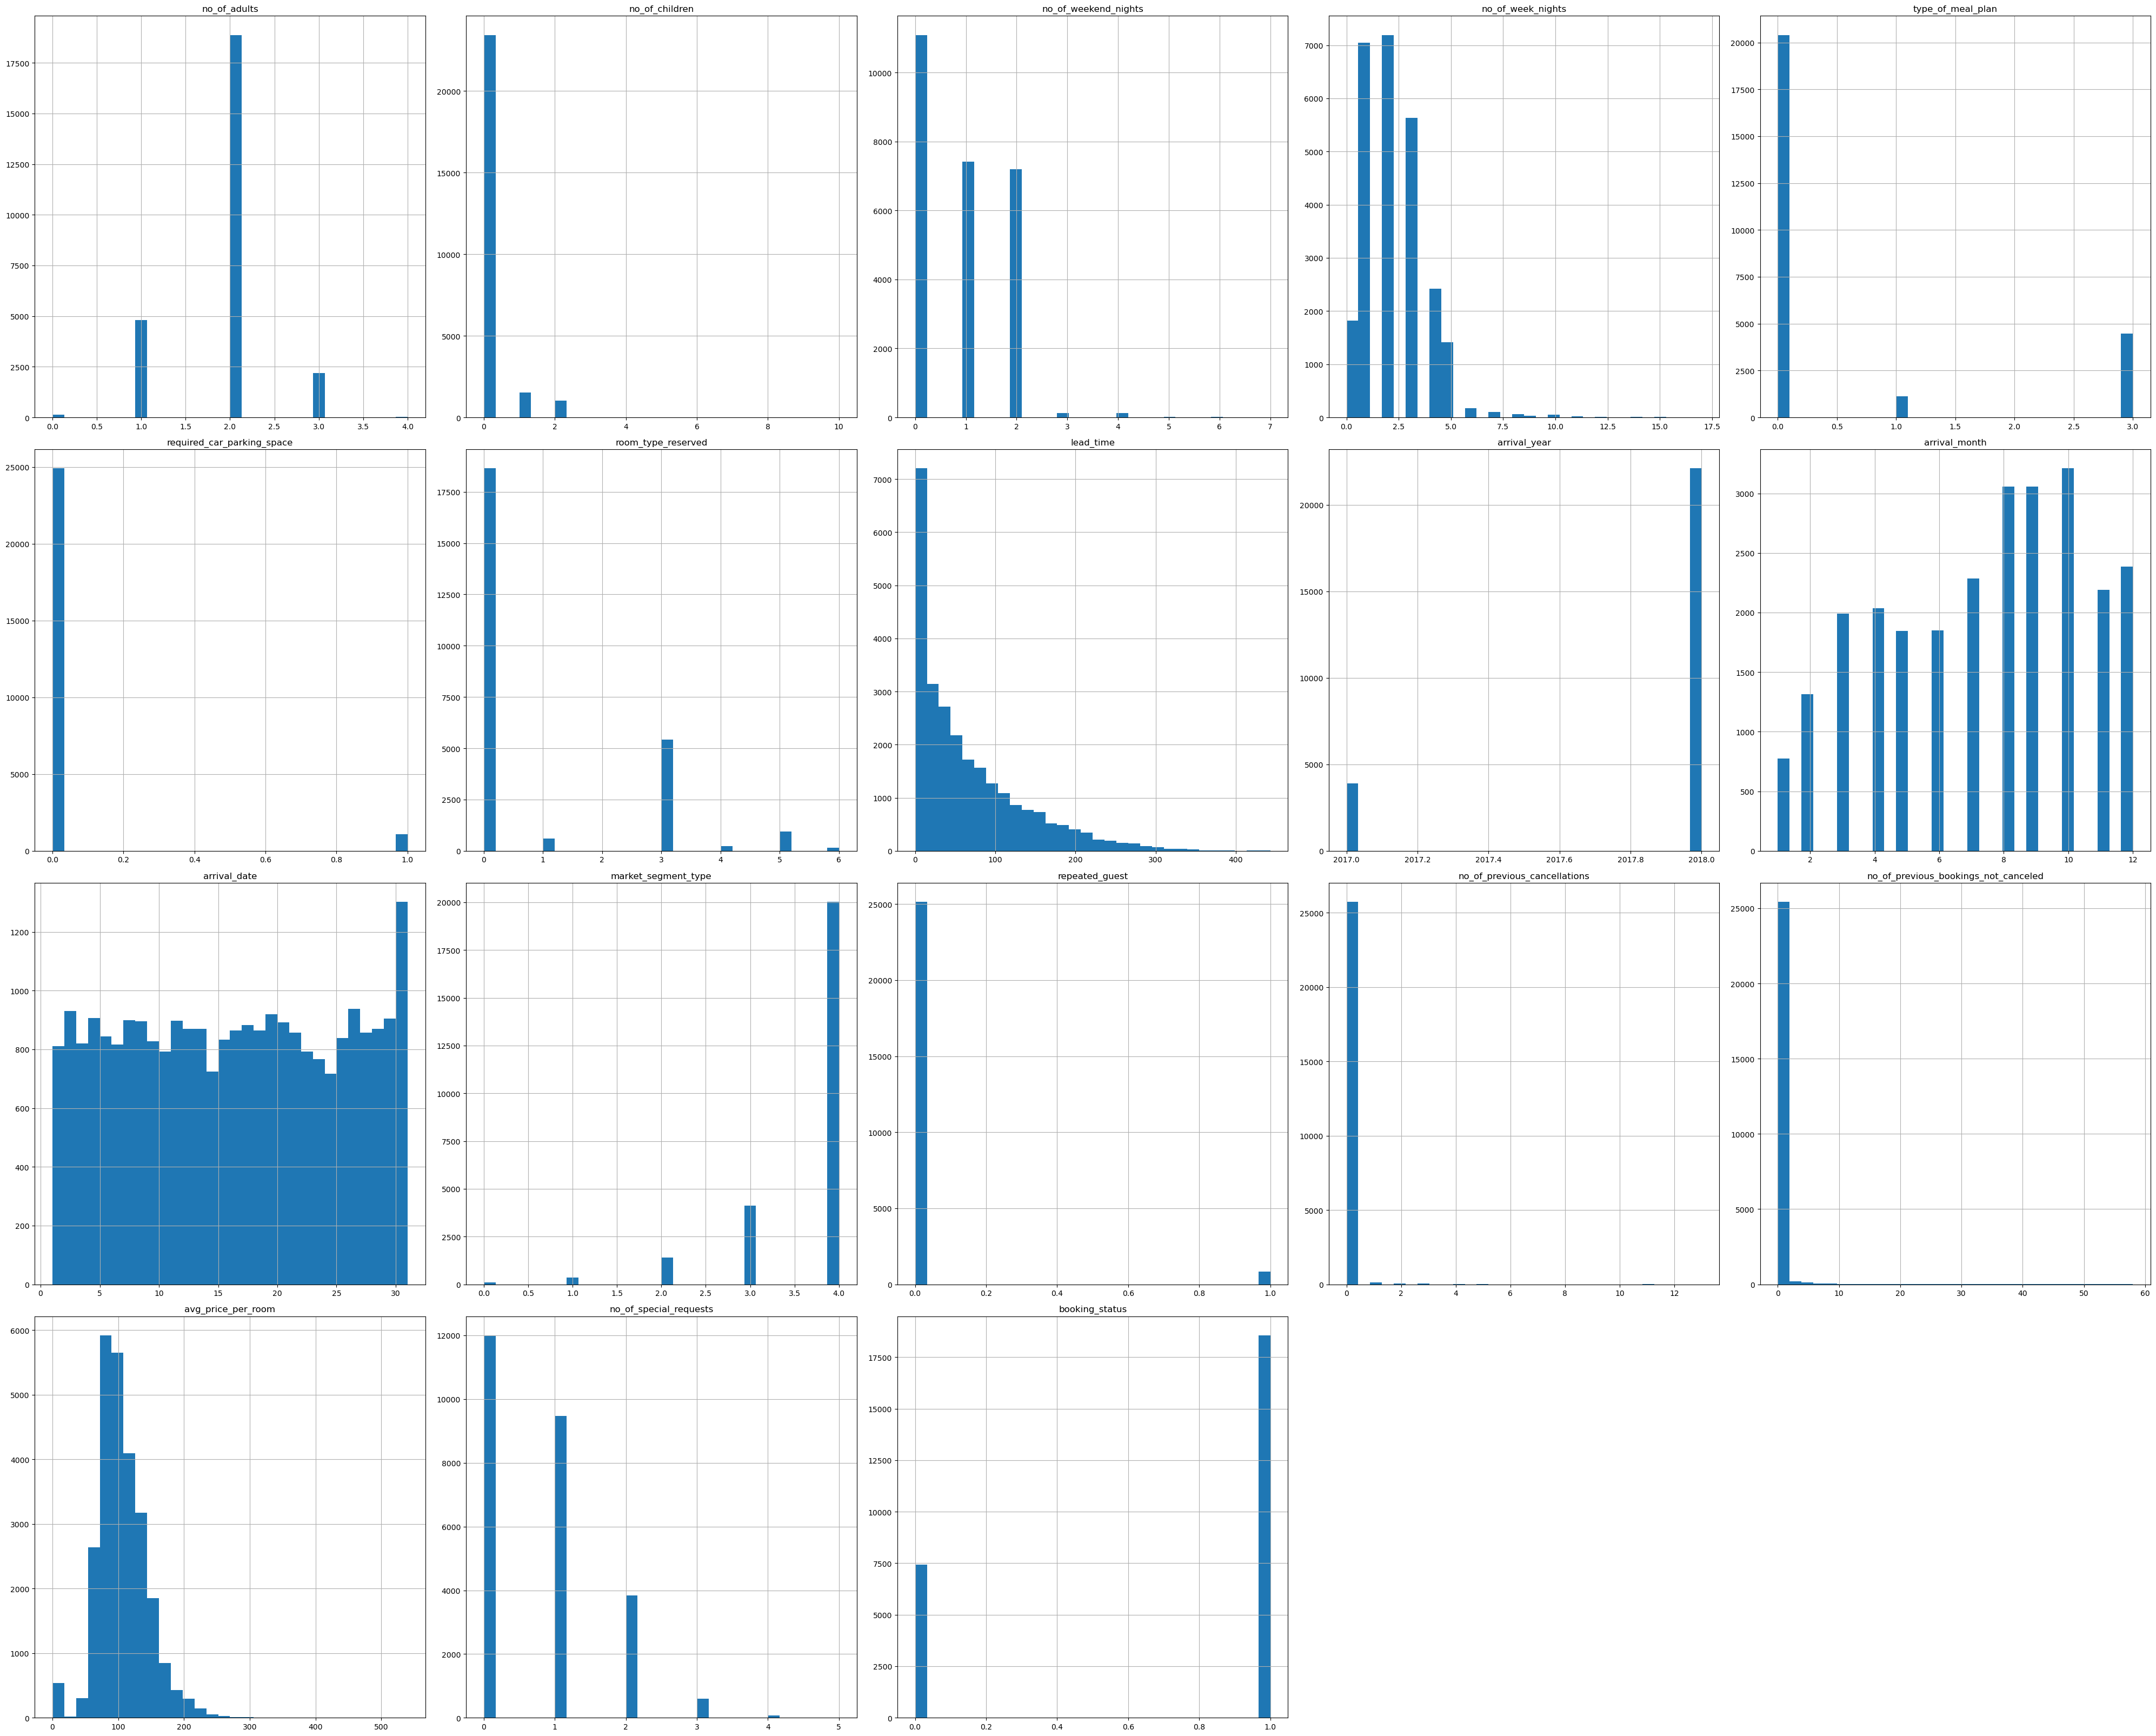

In [76]:
plt.figure(figsize=(40, 40))
df.hist(bins=30, layout=(5,5), figsize=(40, 40))
plt.tight_layout()
plt.show()

Okej, teraz stopień niezbalansowania.

<Axes: xlabel='booking_status', ylabel='count'>

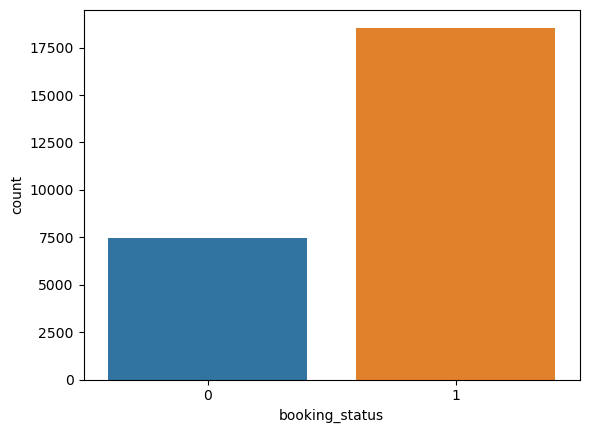

In [77]:
sns.countplot(data=df, x='booking_status')

In [78]:
df.sample(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
3372,2,0,2,5,0,0,0,4,2017,8,14,4,0,0,0,106.14,1,1
16787,2,0,0,3,0,0,0,76,2018,11,3,4,0,0,0,93.60,1,0
23519,2,0,2,5,0,0,0,53,2018,8,8,3,0,0,0,85.00,0,1
33180,2,0,1,1,0,0,0,12,2017,12,5,3,0,0,0,55.00,0,1
16887,2,0,0,3,0,0,0,0,2017,8,11,4,0,0,0,124.00,0,1
1639,2,0,2,0,0,1,0,2,2018,12,18,4,0,0,0,106.50,1,1
18834,3,0,0,1,0,0,0,168,2018,8,13,4,0,0,0,146.70,1,0
32375,2,0,1,2,3,0,0,17,2018,1,29,4,0,0,0,77.00,1,1
22586,3,0,0,4,1,0,3,200,2018,8,24,4,0,0,0,187.50,1,0
25987,1,0,1,2,0,0,0,273,2018,9,30,4,0,0,0,100.80,0,0


okej, to teraz spróbujmy ogarnąć outliers.

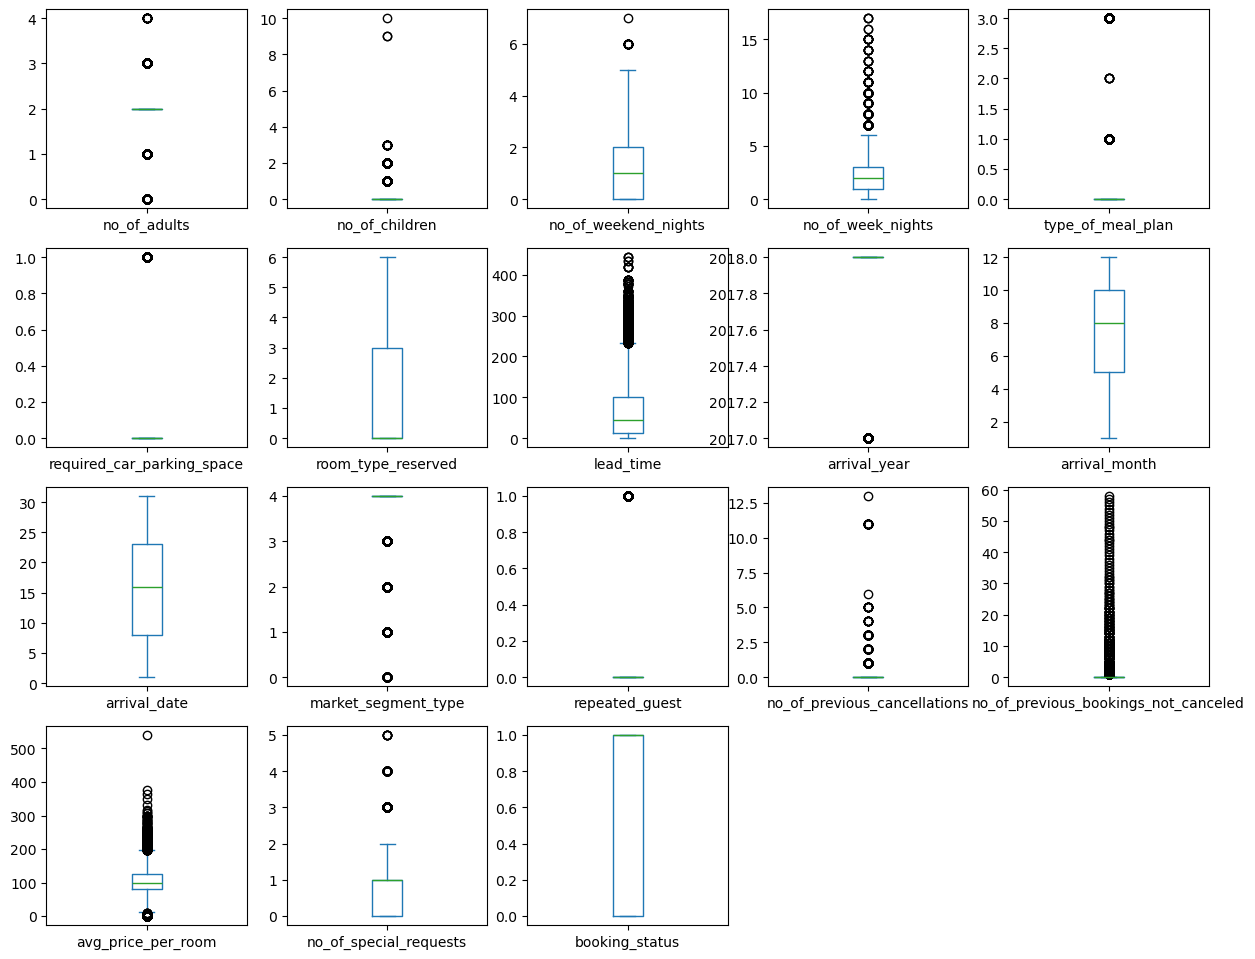

In [81]:
df.plot(kind="box", subplots=True, figsize=(15,15), layout=(5,5))
plt.show()

Dobra, trochę ich jest, więc pousuwajmy.

<Axes: xlabel='lead_time'>

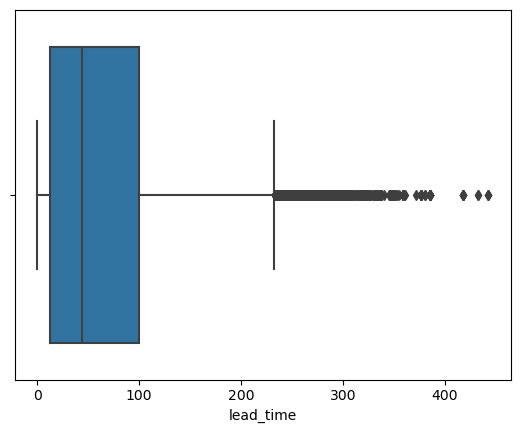

In [82]:
sns.boxplot(data=df, x='lead_time')

<Axes: xlabel='lead_time'>

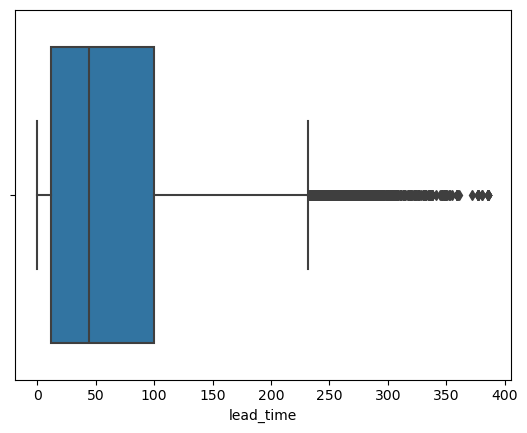

In [85]:
df = df[df['lead_time'] <= 400]
sns.boxplot(data=df, x='lead_time')